In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


import warnings
warnings.filterwarnings('ignore')

In [2]:
tracks = pd.read_csv('Spotify-2000.csv')
tracks.head()

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


In [3]:
tracks.shape

(1994, 15)

In [4]:
tracks.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Index                   1994 non-null   int64 
 1   Title                   1994 non-null   object
 2   Artist                  1994 non-null   object
 3   Top Genre               1994 non-null   object
 4   Year                    1994 non-null   int64 
 5   Beats Per Minute (BPM)  1994 non-null   int64 
 6   Energy                  1994 non-null   int64 
 7   Danceability            1994 non-null   int64 
 8   Loudness (dB)           1994 non-null   int64 
 9   Liveness                1994 non-null   int64 
 10  Valence                 1994 non-null   int64 
 11  Length (Duration)       1994 non-null   object
 12  Acousticness            1994 non-null   int64 
 13  Speechiness             1994 non-null   int64 
 14  Popularity              1994 non-null   int64 
dtypes: i

In [5]:
tracks.isnull().sum()


Index                     0
Title                     0
Artist                    0
Top Genre                 0
Year                      0
Beats Per Minute (BPM)    0
Energy                    0
Danceability              0
Loudness (dB)             0
Liveness                  0
Valence                   0
Length (Duration)         0
Acousticness              0
Speechiness               0
Popularity                0
dtype: int64

<Axes: >

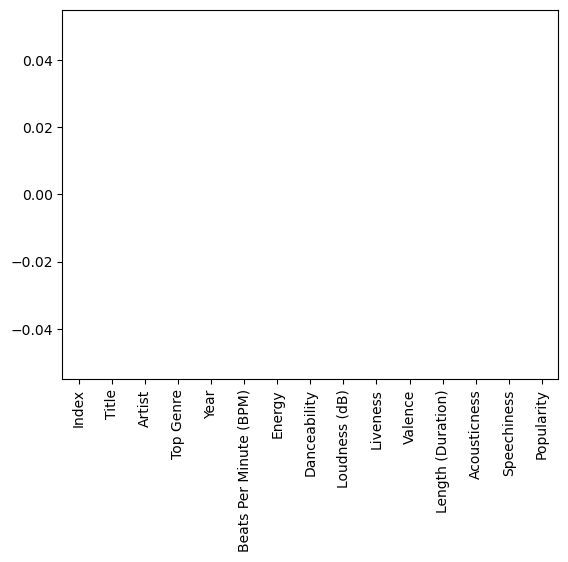

In [6]:
tracks.dropna(inplace = True)
tracks.isnull().sum().plot.bar()


In [7]:
tracks = tracks.drop(['Index', 'Artist'], axis = 1)


In [8]:
tracks['Title'].nunique(), tracks.shape


(1958, (1994, 13))

In [9]:
tracks = tracks.sort_values(by=['Popularity'], ascending=False)
tracks.drop_duplicates(subset=['Title'], keep='first', inplace=True)


In [10]:
%%capture
song_vectorizer = CountVectorizer()
song_vectorizer.fit(tracks['Top Genre'])


In [11]:
tracks = tracks.sort_values(by=['Popularity'], ascending=False).head(10000)


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd
song_name=input("Enter Song Name ")
def get_similarities(song_name, data):
    # Getting vector for the input song.
    song_vectorizer = TfidfVectorizer()
    text_corpus = data['Top Genre'].astype(str)
    song_vectorizer.fit(text_corpus)

    song_data = data[data['Title'] == song_name]

    text_array1 = song_vectorizer.transform(song_data['Top Genre']).toarray()
    num_array1 = song_data.select_dtypes(include=np.number).to_numpy()

    sim = []
    for idx, row in data.iterrows():
        name = row['Title']
        text_array2 = song_vectorizer.transform(data[data['Title'] == name]['Top Genre']).toarray()
        num_array2 = data[data['Title'] == name].select_dtypes(include=np.number).to_numpy()

        # Check if dimensions are compatible
        if text_array1.shape[1] == text_array2.shape[1] and num_array1.shape[1] == num_array2.shape[1]:
            # Calculating similarities for text as well as numeric features
            text_sim = cosine_similarity(text_array1, text_array2)[0][0]
            num_sim = cosine_similarity(num_array1, num_array2)[0][0]
            sim.append(text_sim + num_sim)
        else:
            # Handle the case where dimensions are incompatible
            sim.append(0.0)  # or any other appropriate handling

    return sim

data = pd.read_csv('Spotify-2000.csv')
similarities = get_similarities(song_name, data)
def recommend_songs(song_name, data=tracks):
# Base case
    if tracks[tracks['Title'] == song_name].shape[0] == 0:
        print('This song is either not so popular or you\
        have entered invalid_name.\n Some songs you may like:\n')
        for song in data.sample(n=5)['Title'].values:
            print(song)
            return

data['similarity_factor'] = get_similarities(song_name, data)

data.sort_values(by=['similarity_factor', 'Top Genre'],
                    ascending = [False, False],
                    inplace=True)

# First song will be the input song itself as the similarity will be highest.
display(data[['Title', 'Artist','Top Genre']][2:7])



Enter Song Name Without Me


,Title,Artist,Top Genre
114,"Lose Yourself - From ""8 Mile"" Soundtrack",Eminem,detroit hip hop
192,The Real Slim Shady,Eminem,detroit hip hop
219,Stan,Eminem,detroit hip hop
546,The Monster,Eminem,detroit hip hop
1824,My Name Is,Eminem,detroit hip hop
